# DIGIT RECOGNITION USING CNN (Convolutional Neural Networks)

## Import Libraries

In [32]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

## Load dataset

In [33]:
mnist = tf.keras.datasets.mnist

# Split dataset
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

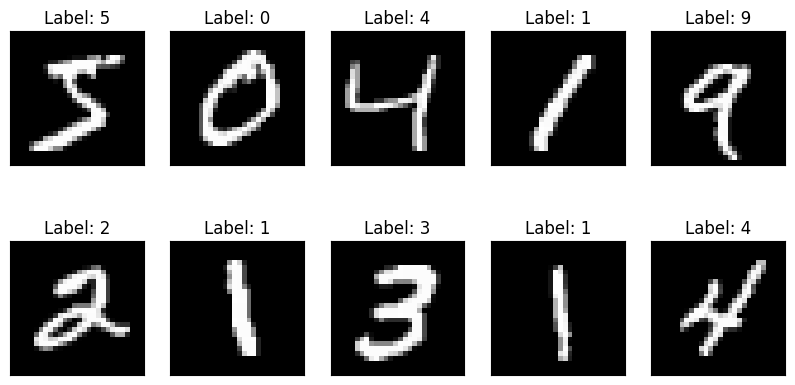

In [34]:
# Exploring dataset

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_imgs[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.xticks([])
    plt.yticks([])

plt.show() # This will print the first 10 training images from the MNIST dataset along with their labels

## Data Preprocessing

In [35]:
# Normalization
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

## Define and compile the model

In [36]:
model = keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 512)              

## Train the model

In [38]:
model.fit(train_imgs, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4959 - accuracy: 0.8592
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1328 - accuracy: 0.9607
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0921 - accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0733 - accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0617 - accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0530 - accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0465 - accuracy: 0.9859
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0423 - accuracy: 0.9872
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0374 - accuracy: 0.9889
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

## Testing the model

In [39]:
# Testing model on unseen data
model.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0379 - accuracy: 0.9876


[0.037859074771404266, 0.9876000285148621]

By using CNNs, we've reached an accuracy of 98.98% on training data and 98.7% on testing data.